# Dataset Information

Dataset Link: https://www.kaggle.com/datasets/mayurdalvi/twitter-sentiments-analysis-nlp
## Context
This dataset contain the data of tweets which are either racist or not racist.

## Columns of the dataset
* id : Tweet ID
* label : 1 -> denotes the tweet is racist/sexist , 0 -> denotes the tweet is NOT racist/sexist
* tweet : Content of tweetsweet. tweets

In [55]:
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [58]:
#remove patterns in input text

def remove_patterns(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for word in r:
        input_txt = re.sub(word,"",input_txt)
    return input_txt

In [59]:
# remove twitter handles

df['text'] = np.vectorize(remove_patterns)(df['tweet'],"@[\w]*")
df.head()

,id,label,tweet,text
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [60]:
#remove special characters, numbers and punctuations

df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ",regex=True)
df.head()

,id,label,tweet,text
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [61]:
# remove short words

df['text'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,text
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [1]:
sum = lambda x,y: x + y
result = sum(2,4)
print(result)

6


In [62]:
# individual words considered as tokens

tokenized_tweet = df['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: text, dtype: object

In [63]:
# stem the words

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: text, dtype: object

In [64]:
# combine words into single sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['text'] = tokenized_tweet
df.head()

,id,label,tweet,text
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

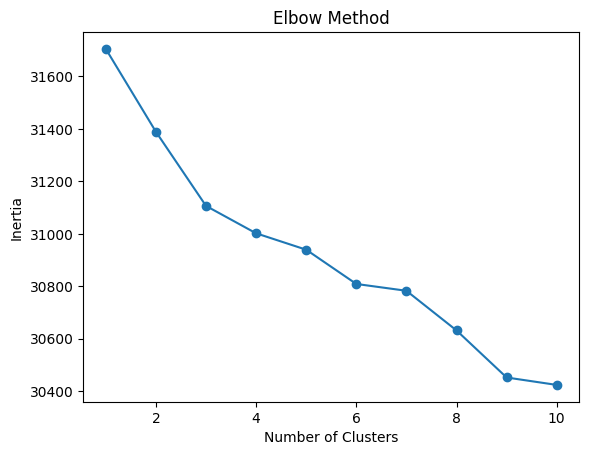

In [66]:
# Finding Optimal Number of Clusters using Elbow Method

def find_optimal_clusters(data, max_k):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias


max_clusters = 10
inertias = find_optimal_clusters(X, max_clusters)

plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

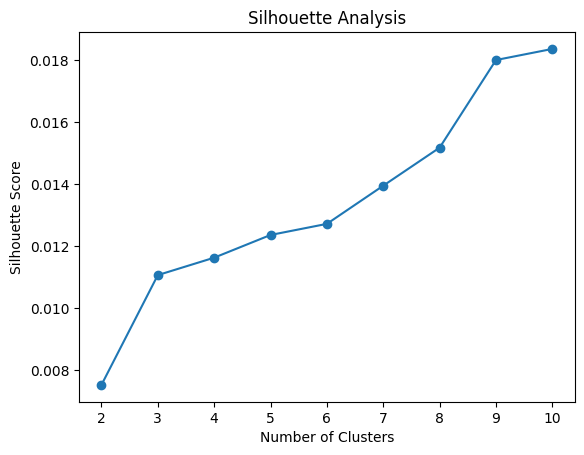

In [67]:
# Finding Optimal Number of Clusters using Silhouette Analysis

sil_scores = []
for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X,labels)
    sil_scores.append(sil_score)

plt.plot(range(2, max_clusters + 1), sil_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [68]:
optimal_clusters = sil_scores.index(max(sil_scores)) + 2
print(f'Optimal number of clusters: {optimal_clusters}')

Optimal number of clusters: 10


In [69]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
print(df[['text','cluster']])

                                                    text  cluster
0      when father dysfunct selfish drag kid into dys...        0
1      thank #lyft credit caus they offer wheelchair ...        0
2                                    bihday your majesti        0
3                             #model love take with time        5
4                               factsguid societi #motiv        0
...                                                  ...      ...
31957                                         that youuu        0
31958  nina turner airwav tri wrap herself mantl genu...        0
31959                       listen song monday morn work        0
31960        #sikh #templ vandalis #calgari #wso condemn        0
31961                                       thank follow        2

[31962 rows x 2 columns]


In [70]:
df['cluster'].value_counts(sort=True,ascending=False)

cluster
0    25128
7     2171
6     1028
8      775
3      671
4      632
2      494
9      412
5      327
1      324
Name: count, dtype: int64

In [71]:
df['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [74]:
for cluster in range(optimal_clusters):
  print(f"Cluster {cluster}:\n")
  print(df[df['cluster'] == cluster]['text'].head(5))
  print("\n")

Cluster 0:

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
4                             factsguid societi #motiv
5    huge fare talk befor they leav chao disput whe...
Name: text, dtype: object


Cluster 1:

35     #taylorswift bull will domin your bull will di...
194    #argentina attack bull game realli think that ...
196    #nohcarolina bull will domin your bull will di...
254    #dreamcatch bull will domin your bull will dir...
308    #blackpool attack bull game realli think that ...
Name: text, dtype: object


Cluster 2:

16      thank have paner #thank #posit
39         thank sunshin #thank #posit
105    thank good friend #thank #posit
189            thank cat #thank #posit
204        thank enteain #thank #posit
Name: text, dtype: object


Cluster 3:

126    fleurett #instaboy#instaman#sefie#septum#frien...
148    listen most beauti best friend sing with most ...